In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd

**Training And Testing Data Generator**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_gen =ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_gen.flow_from_directory('C:/Users/snket/OneDrive/Desktop/train_zip',
                                                target_size=(300,300),batch_size=32,class_mode='categorical')

Found 250 images belonging to 4 classes.


In [6]:
test_gen =ImageDataGenerator(rescale=1./255)

In [7]:
test_generator = test_gen.flow_from_directory('C:/Users/snket/OneDrive/Desktop/test_zip',
                                              target_size=(300,300),batch_size=32,class_mode='categorical')

Found 60 images belonging to 4 classes.


**Labeling**

In [8]:
labels_idx = (train_generator.class_indices)
idx_labels = dict((v,k) for k,v in labels_idx.items())
#Let's take a look how to map classes.
idx_labels

{0: 'apple', 1: 'banana', 2: 'mixed', 3: 'orange'}

In [9]:
images,labels=train_generator.next()
print(images.shape,labels.shape)

(32, 300, 300, 3) (32, 4)


**Building CNN Model**

In [57]:
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

In [60]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(300,300,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [12]:
history = model.fit(train_generator,epochs=10,batch_size=50,validation_data=(test_generator))

Epoch 1/10
8/8 [==============================] - 49s 6s/step - loss: 6.8272 - acc: 0.2760 - val_loss: 2.6270 - val_acc: 0.3000
Epoch 2/10
8/8 [==============================] - 42s 5s/step - loss: 3.1764 - acc: 0.2920 - val_loss: 3.5701 - val_acc: 0.4000
Epoch 3/10
8/8 [==============================] - 42s 5s/step - loss: 2.0830 - acc: 0.4160 - val_loss: 1.2475 - val_acc: 0.4167
Epoch 4/10
8/8 [==============================] - 42s 5s/step - loss: 1.4274 - acc: 0.4400 - val_loss: 1.2173 - val_acc: 0.4667
Epoch 5/10
8/8 [==============================] - 42s 5s/step - loss: 1.2542 - acc: 0.4360 - val_loss: 1.1342 - val_acc: 0.5000
Epoch 6/10
8/8 [==============================] - 42s 5s/step - loss: 1.0771 - acc: 0.5360 - val_loss: 1.0619 - val_acc: 0.5333
Epoch 7/10
8/8 [==============================] - 42s 5s/step - loss: 0.9598 - acc: 0.6160 - val_loss: 0.8760 - val_acc: 0.5833
Epoch 8/10
8/8 [==============================] - 42s 5s/step - loss: 0.8088 - acc: 0.6680 - val_loss: 0

In [13]:
history = model.fit(train_generator,epochs=30,batch_size=50,validation_data=(test_generator))

Epoch 1/30
8/8 [==============================] - 47s 6s/step - loss: 0.6300 - acc: 0.7720 - val_loss: 1.4837 - val_acc: 0.7333
Epoch 2/30
8/8 [==============================] - 44s 5s/step - loss: 0.5631 - acc: 0.8080 - val_loss: 1.4334 - val_acc: 0.7667
Epoch 3/30
8/8 [==============================] - 42s 5s/step - loss: 0.5862 - acc: 0.8080 - val_loss: 1.6146 - val_acc: 0.7500
Epoch 4/30
8/8 [==============================] - 42s 5s/step - loss: 0.5280 - acc: 0.8080 - val_loss: 1.2692 - val_acc: 0.8000
Epoch 5/30
8/8 [==============================] - 42s 5s/step - loss: 0.4932 - acc: 0.8240 - val_loss: 1.0568 - val_acc: 0.8500
Epoch 6/30
8/8 [==============================] - 42s 5s/step - loss: 0.3733 - acc: 0.8520 - val_loss: 1.3407 - val_acc: 0.7667
Epoch 7/30
8/8 [==============================] - 42s 5s/step - loss: 0.4262 - acc: 0.8480 - val_loss: 1.2540 - val_acc: 0.8167
Epoch 8/30
8/8 [==============================] - 42s 5s/step - loss: 0.3446 - acc: 0.8720 - val_loss: 1

In [15]:
print(history.history['acc'][-1])
print(history.history['val_acc'][-1])

0.9440000057220459
0.8166666626930237


**Prediction**

In [46]:
path = 'C:/Users/snket/OneDrive/Desktop/test_zip/apple/apple_80.jpg'

In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np

# loads the image and resizes
img = image.load_img(path, target_size=(300,300,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

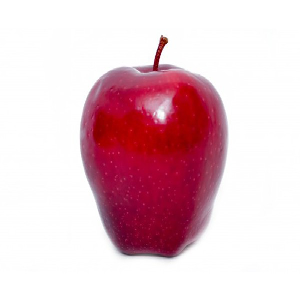

In [48]:
img

In [49]:
final_pred = model.predict(x)

1/1 [==============================] - 0s 48ms/step


In [50]:
final_pred 

array([[1.0000000e+00, 3.0615137e-12, 5.1338879e-17, 6.1521743e-10]],
      dtype=float32)

In [51]:
pred_digits=np.argmax(final_pred,axis=1)
pred_digits

array([0], dtype=int64)

In [52]:
#{0: 'apple', 1: 'banana', 2: 'mixed', 3: 'orange'}

In [61]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(300,300,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=40,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(Flatten())
model.add(Dense(30,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [62]:
history = model.fit(train_generator,epochs=30,batch_size=50,validation_data=(test_generator))

Epoch 1/30
8/8 [==============================] - 46s 6s/step - loss: 4.0162 - acc: 0.3160 - val_loss: 2.7016 - val_acc: 0.3333
Epoch 2/30
8/8 [==============================] - 44s 5s/step - loss: 1.4766 - acc: 0.4360 - val_loss: 1.6770 - val_acc: 0.4167
Epoch 3/30
8/8 [==============================] - 43s 5s/step - loss: 1.7653 - acc: 0.6040 - val_loss: 1.0189 - val_acc: 0.6167
Epoch 4/30
8/8 [==============================] - 43s 6s/step - loss: 1.2575 - acc: 0.6560 - val_loss: 1.8743 - val_acc: 0.5167
Epoch 5/30
8/8 [==============================] - 43s 5s/step - loss: 1.5133 - acc: 0.6160 - val_loss: 1.4120 - val_acc: 0.6833
Epoch 6/30
8/8 [==============================] - 45s 6s/step - loss: 1.0363 - acc: 0.7320 - val_loss: 1.1998 - val_acc: 0.6833
Epoch 7/30
8/8 [==============================] - 44s 6s/step - loss: 0.8266 - acc: 0.7360 - val_loss: 0.9973 - val_acc: 0.7167
Epoch 8/30
8/8 [==============================] - 43s 5s/step - loss: 0.7227 - acc: 0.8040 - val_loss: 0